# Time Series Introduction

Many phenomena in our day-to-day lives, such as the movement of stock prices, are measured in intervals over a period of time. Time series analysis methods are extremely useful for analyzing these special data types.

## Exploring raw time series
The most common first step when conducting time series analysis is to display your time series dataset in a visually intuitive format.

In [1]:
options(warn = -1)

library(tidytext)


In [2]:
df <- read.csv("datasets/timeseries/Nile.csv")

In [3]:
head(df)

streamflow
1120
1160
963
1210
1160
1160


In [8]:
Nile <- ts(df["streamflow"], start = 1871, end = 1970, frequency = 1)

In [9]:
print(Nile)

Time Series:
Start = 1871 
End = 1970 
Frequency = 1 
       streamflow
  [1,]       1120
  [2,]       1160
  [3,]        963
  [4,]       1210
  [5,]       1160
  [6,]       1160
  [7,]        813
  [8,]       1230
  [9,]       1370
 [10,]       1140
 [11,]        995
 [12,]        935
 [13,]       1110
 [14,]        994
 [15,]       1020
 [16,]        960
 [17,]       1180
 [18,]        799
 [19,]        958
 [20,]       1140
 [21,]       1100
 [22,]       1210
 [23,]       1150
 [24,]       1250
 [25,]       1260
 [26,]       1220
 [27,]       1030
 [28,]       1100
 [29,]        774
 [30,]        840
 [31,]        874
 [32,]        694
 [33,]        940
 [34,]        833
 [35,]        701
 [36,]        916
 [37,]        692
 [38,]       1020
 [39,]       1050
 [40,]        969
 [41,]        831
 [42,]        726
 [43,]        456
 [44,]        824
 [45,]        702
 [46,]       1120
 [47,]       1100
 [48,]        832
 [49,]        764
 [50,]        821
 [51,]        768
 [52,]    

In [10]:
length(Nile)

[1] 100

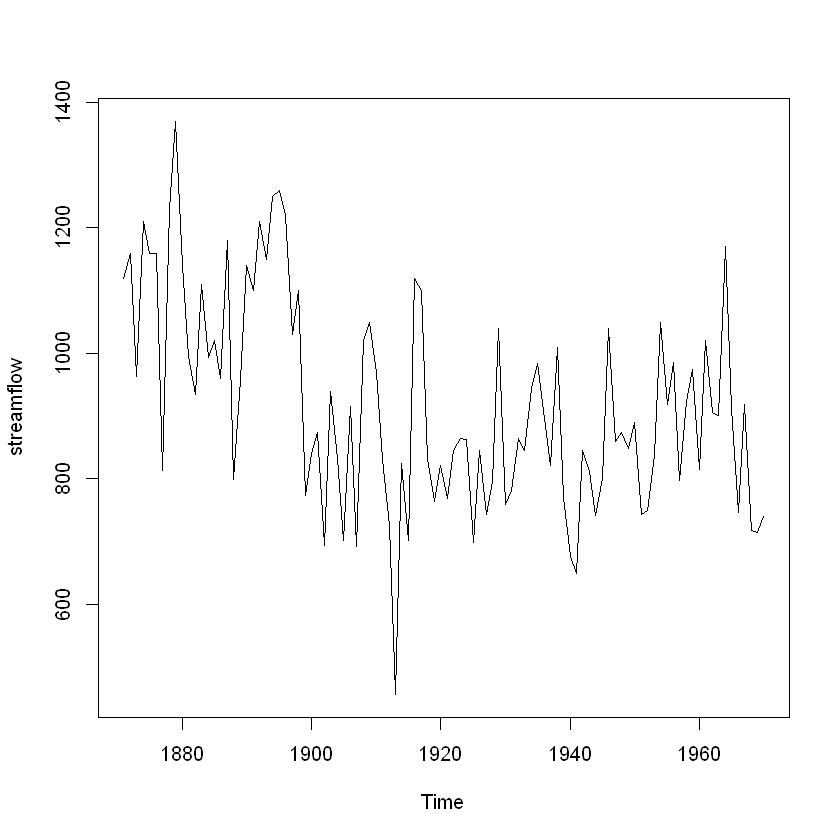

In [12]:
plot(Nile)

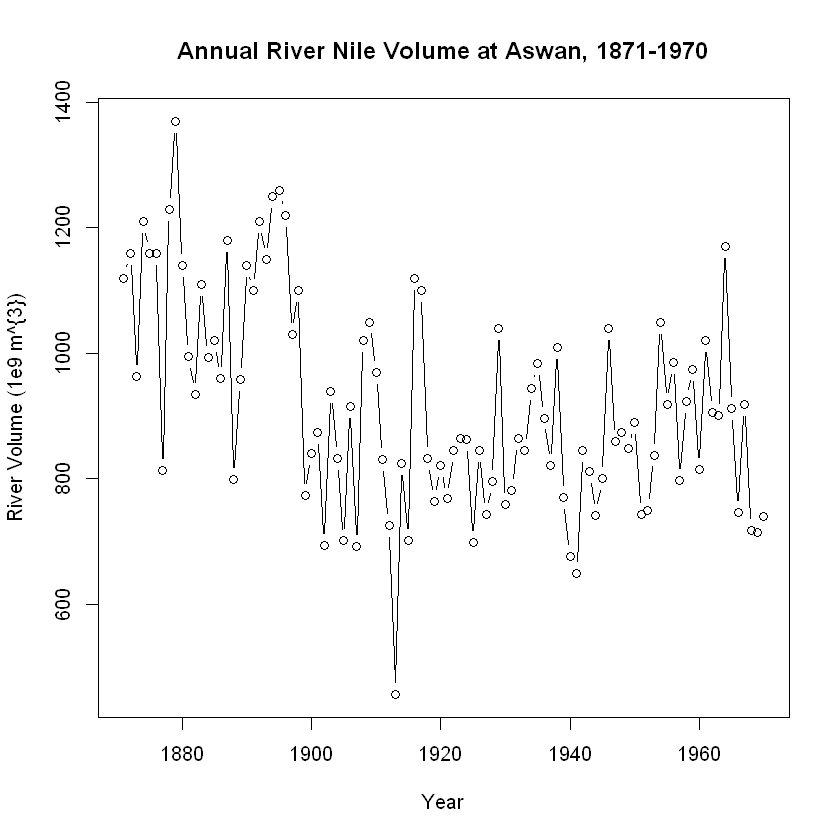

In [16]:
# renaming the X and Y axis
plot(Nile, xlab = "Year", ylab = "River Volume (1e9 m^{3})", 
         main = "Annual River Nile Volume at Aswan, 1871-1970", type = "b")

## What does the time index tell us?
Some data are naturally evenly spaced by time. The time series discrete_data shown has 20 observations, with one observation appearing at each of the discrete time indices 1 through 20. Discrete time indexing is appropriate for discrete_data.

In [24]:
data <- c(0.47942554,0.84147098,0.99749499,0.90929743,0.59847214,0.14112001,-0.35078323,-0.75680250,-0.97753012,-0.95892427,-0.70554033,-0.27941550
,0.21511999,0.65698660,0.93799998,0.98935825,0.79848711,0.41211849,-0.07515112,-0.54402111)

discrete_data <- ts(data, start = 1, end = 20, frequency = 1)
print(discrete_data)

Time Series:
Start = 1 
End = 20 
Frequency = 1 
 [1]  0.47942554  0.84147098  0.99749499  0.90929743  0.59847214  0.14112001
 [7] -0.35078323 -0.75680250 -0.97753012 -0.95892427 -0.70554033 -0.27941550
[13]  0.21511999  0.65698660  0.93799998  0.98935825  0.79848711  0.41211849
[19] -0.07515112 -0.54402111


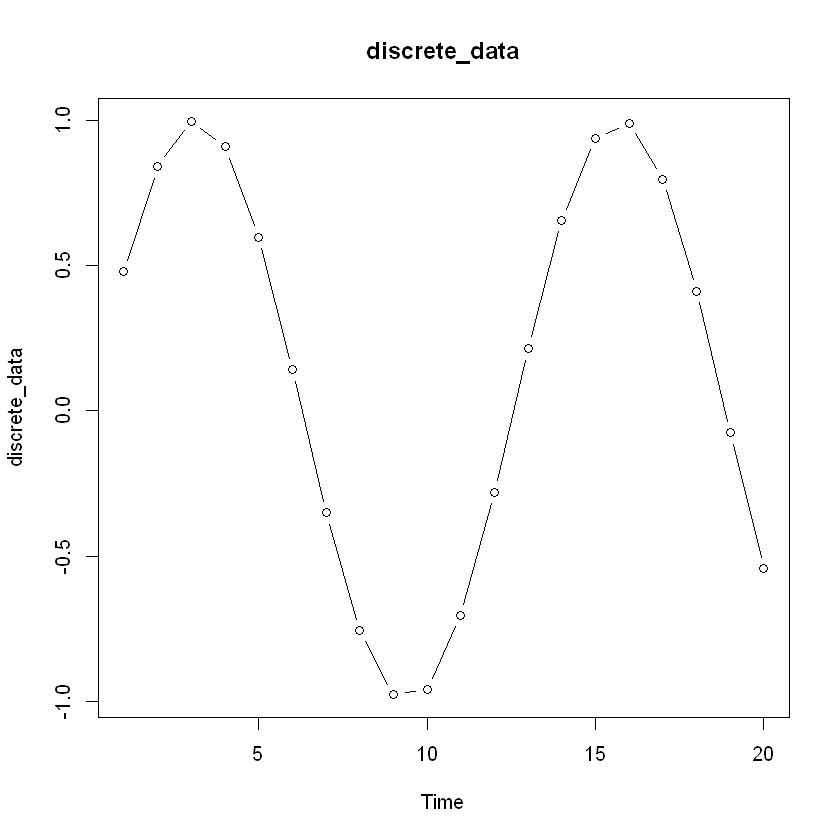

In [30]:
plot(discrete_data, type = "b", main = "discrete_data")

The time series continuous_series shown also has 20 observations, it is following the same periodic pattern as discrete_data, but its observations are not evenly spaced. Its first, second, and last observations were observed at times 1.210322, 1.746137, and 20.180524, respectively. Continuous time indexing is natural for continuous_series, however, the observations are approximately evenly spaced, with about 1 observation observed per time unit. Let's investigate using a discrete time indexing for continuous_series.

In [22]:
data2 <- c(0.56889468,0.76630408,0.99207512,0.97481741,0.39912320,0.37660246
,-0.38532033,-0.83635852,-0.99966983,-0.99831019,-0.64622280,-0.09386151
,0.40052909,0.68160578,0.95318159,0.99693803,0.83934194,0.37003754
,-0.25509676,-0.61743983)

continuous_series <- data2
print(continuous_series)

 [1]  0.56889468  0.76630408  0.99207512  0.97481741  0.39912320  0.37660246
 [7] -0.38532033 -0.83635852 -0.99966983 -0.99831019 -0.64622280 -0.09386151
[13]  0.40052909  0.68160578  0.95318159  0.99693803  0.83934194  0.37003754
[19] -0.25509676 -0.61743983


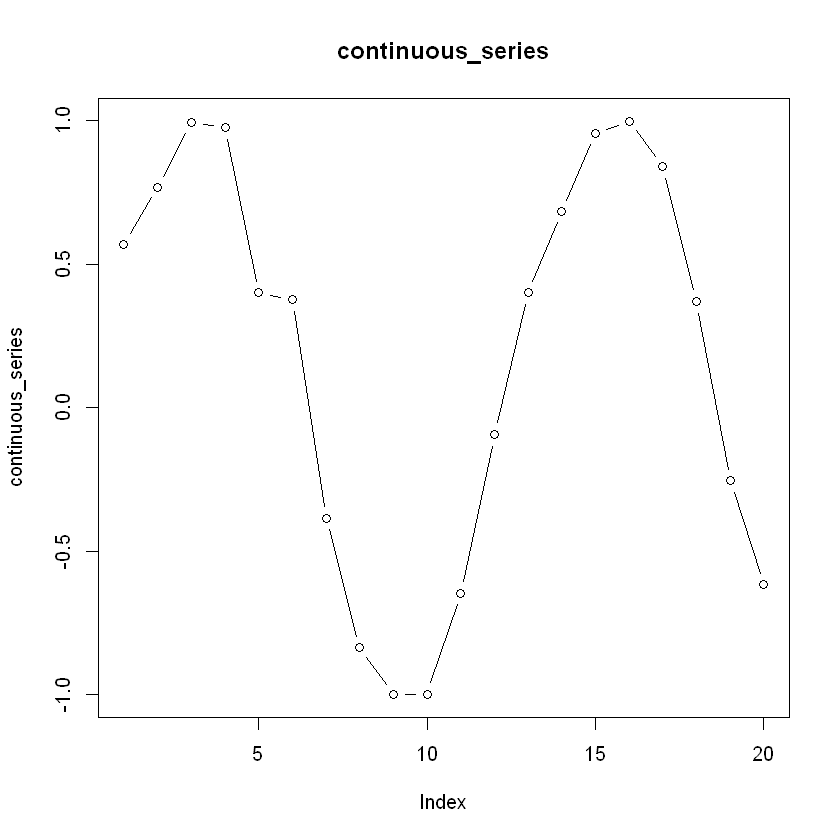

In [31]:
plot(continuous_series, type = "b", main = "continuous_series")

In [32]:
continuous_time_index <- c(1.210322,1.746137,2.889634,3.591384,5.462065,5.510933,7.074295,8.264398,9.373382,9.541063,11.161122,12.378371,13.390559,14.066280,15.093547,15.864515,16.857413,18.091457,19.365451,20.180524)

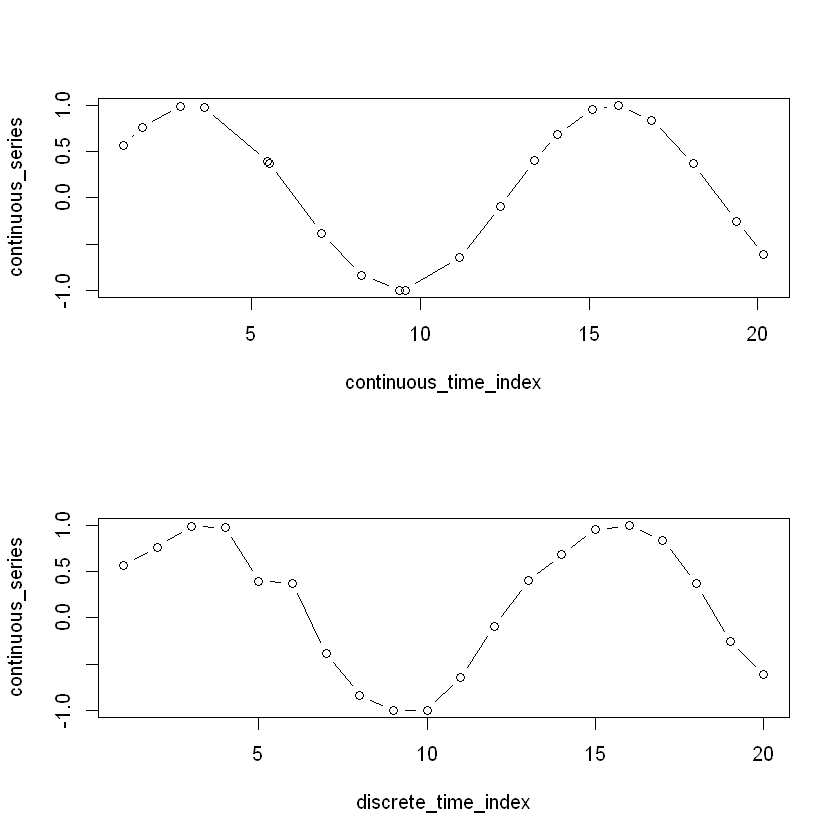

In [35]:
# Plot the continuous_series using continuous time indexing
par(mfrow=c(2,1))
plot(continuous_time_index,continuous_series, type = "b")

# Make a discrete time index using 1:20 
discrete_time_index <- c(1:20)

# Now plot the continuous_series using discrete time indexing
plot(discrete_time_index,continuous_series, type = "b")


Note the various differences between the resulting figures, but the approximation appears reasonable because the overall trend remained preserved

* Sampling Frequency (Exact): Some time series data is EXACTLY evenly spaced. example: hourly temperature measurements
* Sampling Frequency (Approximate): Some time series data is APPROXIMATELY evenly spaced. example: temperature measurements everytime you check your email.
* Sampling Frequency (Missing Values): Some time series data is evenly spaced but with missing values. example: hourly temperature measurements but only during the times you're awake.

#### Basic assumptions
Simplifying assumptions for time series:
* Consecutive observations are equally spaced.
* Apply a discrete-time observation index.
* In practice, this may only hold approximately. 

Example: Daily log returns on stock may only be available for weekdays.


## Identifying the sampling frequency
In addition to viewing your data and plotting over time, there are several additional operations that can be performed on time series datasets.

The start() and end() functions return the time index of the first and last observations, respectively. The time() function calculates a vector of time indices, with one element for each time index on which the series was observed.

The deltat() function returns the fixed time interval between observations and the frequency() function returns the number of observations per unit time. Finally, the cycle() function returns the position in the cycle of each observation.

These commands provide considerable descriptive information about the structures and patterns in your time series data

## When is the sampling frequency exact?
The sampling frequency is often only approximate and the interval between observations is not quite a fixed unit. For example, there are usually 365 days in a year based on the Gregorian calendar. However, (almost) every four years there are 366 days (leap years). This compensates for the fact that the Earth completes a rotation around Sol, the sun, in approximately 365.2422 days, on average.

As a simplifying assumption, we often ignore these small discrepancies and proceed as though the sampling frequency and observation intervals are fixed constants. Typically, our results will not be sensitive to approximation when the underlying process is not changing too quickly.

## Missing values
Sometimes there are missing values in time series data, denoted NA in R, and it is useful to know their locations. It is also important to know how missing values are handled by various R functions. Sometimes we may want to ignore any missingness, but other times we may wish to impute or estimate the missing values.

Let's again consider the monthly AirPassengers dataset, but now the data for the year 1956 are missing. 

The mean() function calculates the sample mean, but it fails in the presence of any NA values. Use mean(___, na.rm = TRUE) to calculate the mean with all missing values removed. It is common to replace missing values with the mean of the observed values. Does this simple data imputation scheme appear adequate when applied the the AirPassengers dataset?

## Creating a time series object with ts()
The function ts() can be applied to create time series objects. A time series object is a vector (univariate) or matrix (multivariate) with additional attributes, including time indices for each observation, the sampling frequency and time increment between observations, and the cycle length for periodic data. Such objects are of the ts class, and represent data that has been observed at (approximately) equally spaced time points. Now you will create time series objects yourself.

The advantage of creating and working with time series objects of the ts class is that many methods are available for utilizing time series attributes, such as time index information. For example, as you've seen in earlier exercises, calling plot() on a ts object will automatically generate a plot over time.

In [40]:
data_vector <- c(2.0521941073,4.2928852797,3.3294132944,3.5085950670,0.0009576938,
1.9217186345,0.7978134128,0.2999543435,0.9435687536,0.5748283388
,-0.0034005903,0.3448649176,2.2229761136,0.1763144576,2.7097622770, 1.2501948965,-0.4007164754,0.8852732121,-1.5852420266,-2.2829278891,-2.5609531290,-3.1259963754,-2.8660295895,-1.7847009207,-1.8894912908
,-2.7255351194,-2.1033141800,-0.0174256893,-0.3613204151,-2.9008403327
,-3.2847440927,-2.8684594718,-1.9505074437,-4.8801892525,-3.2634605353,-1.6396062522,-3.3012575840,-2.6331245433,-1.7058354022,-2.2119825061
,-0.5170595186,0.0752508095,-0.8406994716,-1.4022683487,-0.1382114230
,-1.4065954703,-2.3046941055,1.5073891432,0.7118679477,-1.1300519022)

data_vector

[1]  2.0521941073  4.2928852797  3.3294132944  3.5085950670  0.0009576938
 [6]  1.9217186345  0.7978134128  0.2999543435  0.9435687536  0.5748283388
[11] -0.0034005903  0.3448649176  2.2229761136  0.1763144576  2.7097622770
[16]  1.2501948965 -0.4007164754  0.8852732121 -1.5852420266 -2.2829278891
[21] -2.5609531290 -3.1259963754 -2.8660295895 -1.7847009207 -1.8894912908
[26] -2.7255351194 -2.1033141800 -0.0174256893 -0.3613204151 -2.9008403327
[31] -3.2847440927 -2.8684594718 -1.9505074437 -4.8801892525 -3.2634605353
[36] -1.6396062522 -3.3012575840 -2.6331245433 -1.7058354022 -2.2119825061
[41] -0.5170595186  0.0752508095 -0.8406994716 -1.4022683487 -0.1382114230
[46] -1.4065954703 -2.3046941055  1.5073891432  0.7118679477 -1.1300519022

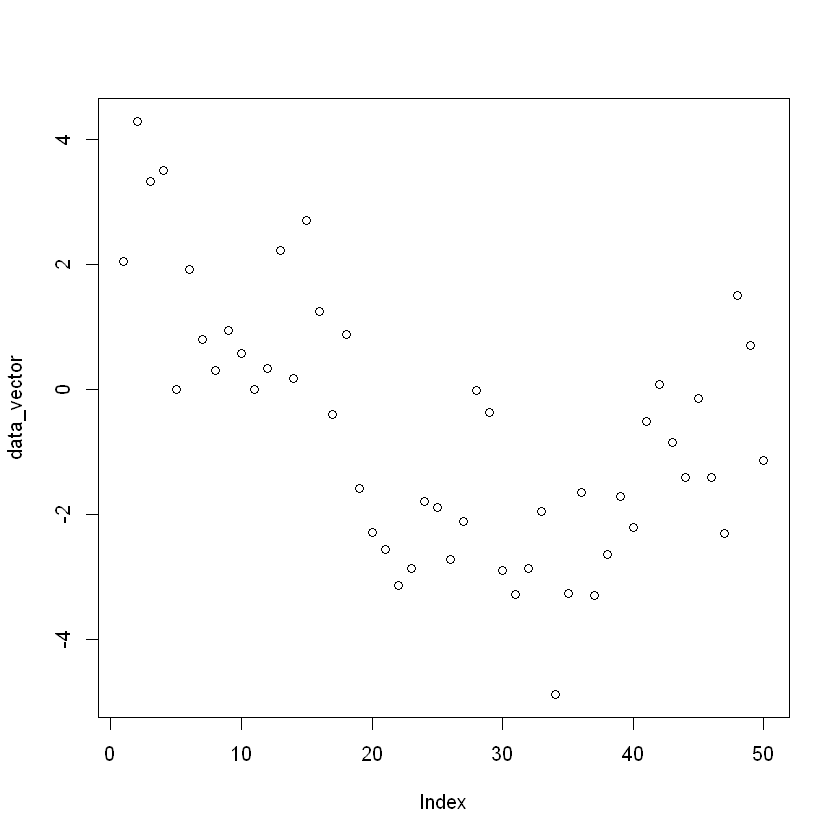

In [41]:
plot(data_vector)

In [43]:
# Convert data_vector to a ts object with start = 2004 and frequency = 4
time_series <- ts(data_vector, start = 2004, frequency = 4)

print(time_series)

              Qtr1          Qtr2          Qtr3          Qtr4
2004  2.0521941073  4.2928852797  3.3294132944  3.5085950670
2005  0.0009576938  1.9217186345  0.7978134128  0.2999543435
2006  0.9435687536  0.5748283388 -0.0034005903  0.3448649176
2007  2.2229761136  0.1763144576  2.7097622770  1.2501948965
2008 -0.4007164754  0.8852732121 -1.5852420266 -2.2829278891
2009 -2.5609531290 -3.1259963754 -2.8660295895 -1.7847009207
2010 -1.8894912908 -2.7255351194 -2.1033141800 -0.0174256893
2011 -0.3613204151 -2.9008403327 -3.2847440927 -2.8684594718
2012 -1.9505074437 -4.8801892525 -3.2634605353 -1.6396062522
2013 -3.3012575840 -2.6331245433 -1.7058354022 -2.2119825061
2014 -0.5170595186  0.0752508095 -0.8406994716 -1.4022683487
2015 -0.1382114230 -1.4065954703 -2.3046941055  1.5073891432
2016  0.7118679477 -1.1300519022                            


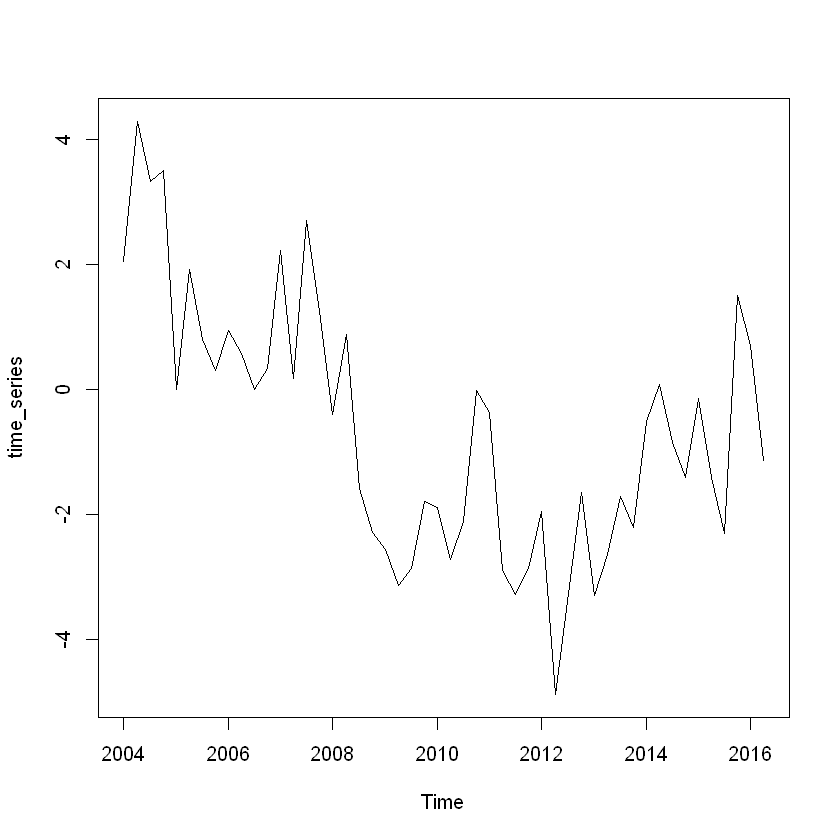

In [44]:
plot(time_series)

As you can see, ts objects are treated differently by commands such as print() and plot(). For example, automatic use of the time-index in your calls to plot() requires a ts object.

## Testing whether an object is a time series
When you work to create your own datasets, you can build them as ts objects. Recall the dataset data_vector from the previous exercise, which was just a vector of numbers, and time_series, the ts object you created from data_vector using the ts() function and information regarding the start time and the observation frequency. As a reminder, data_vector and time_series are shown in the plot on the right.

When you use datasets from others, such as those included in an R package, you can check whether they are ts objects using the is.ts() command. The result of the test is either TRUE when the data is of the ts class, or FALSE if it is not.

In this exercise, you'll explore the class of the datasets you've been using throughout this chapter.